Global Parameters


## pandas 1.5.3 version was installed by conda environment

In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo, showerror
from tkinter.scrolledtext import ScrolledText
from tkinter import PhotoImage
from pathlib import Path
from functools import partial
from fileorganizer import FileOrganizer 
import utils as ut
import pandas as pd
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns

In [2]:
#colors
main_colour = '#8991DF'
colour2 = '#377FA5'
colour3 = '#4650B3'
colour4 = '#891A99'

In [3]:
#Files dictionary
raw_files ={}
global df_parameters_raw 
global df_antenna_raw
global dict_parameter 


# Main Window

In [4]:
def validate_files():
    global df_parameters_raw 
    global df_antenna_raw
    messages = []
    
    for key, uploaded_file in raw_files.items():
        if key == 'ParametersDAB':
            df_parameters_raw = uploaded_file.file_processer()
            messages.append(uploaded_file.get_message())
        elif key == 'AntennaDAB':
            df_antenna_raw = uploaded_file.file_processer()
            messages.append(uploaded_file.get_message())
        else:
            print('Entered on default')
            
    if not all(key in raw_files for key in ["AntennaDAB", "ParametersDAB"]):
        showerror(title="Error", message="Not all files are present, please check")
    else:
        showinfo(title="Validation", message=f"{messages[0]}\n\n {messages[1]}\n\n validated ")
        if (isinstance(df_parameters_raw, pd.DataFrame)  and  isinstance(df_antenna_raw, pd.DataFrame)):
            continue_button.config(state="normal")
         

In [5]:
def select_file(file_key):
    filetypes = (("CSV Files", "*.csv"), ("JSON", "*.json"))
    filename = fd.askopenfilename( title="Open a file", initialdir="/Formative_Assignment", filetypes=filetypes)
    if filename:
        route = Path(filename)
        file_type = ut.check_file_format(route)
        open_file = ut.load_file(route)
        categorized_file = FileOrganizer(file_type, open_file, file_key)
        showinfo(title="File Selected", message=filename)
        raw_files[file_key] = categorized_file
        
    else:
        showinfo(title="Error", message="File not selected")

In [6]:
def save_antenna_data_asjson(df):
    df.to_json('saved_antenna.json', orient ='index')
    showinfo(title="File Saved", message=f'The Antenna Data File has been saved')

In [7]:
def save_parameter_data_asjson(df):
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
    df.to_json('saved_parameter.json', orient ='index', date_format = 'iso')
    showinfo(title="File Saved", message=f'The Parameters Data File has been saved')

In [8]:
def continue_flow():
    global df_parameters_raw
    global df_antenna_raw
   
    def convert_to_float(df, col_name):
        df[col_name] = df[col_name].replace(np.nan, '0')
        df[col_name] = df[col_name].str.replace('.', '')
        df[col_name] = df[col_name].str.replace(',', '.').astype(float)
        return df
    
    # Call to functions that make the preliminar data cleaning 
    # PARAMETERS DATA
    #Setting id column as index
    df_parameters_raw.set_index('id', inplace = True)
    #Changing the Format in  Site
    df_parameters_raw['Site'] = df_parameters_raw['Site'].str.title()

    # ANTENNA DATA
    df_antenna_raw.set_index('id', inplace = True)
    #Setting New Column Order
    new_antenna_columns =['NGR', 'Longitude/Latitude', 'Long', 'Lat', 'Site Height', 
        'In-Use Ae Ht','In-Use ERP Total','Dir Max ERP', 
        '0','10','20','30','40','50','60','70','80','90',
        '100','110','120','130','140','150','160','170','180','190',
        '200','210','220','230','240','250','260','270','280','290',
        '300','310','320','330','340','350']
    
    #Changing the of In-Use ERP Total
    df_antenna_raw = df_antenna_raw[new_antenna_columns]
    df_antenna_raw = convert_to_float(df_antenna_raw, 'In-Use ERP Total')

    print(f'The parameters DAB\n: {df_parameters_raw.head()}')
    print(f'The antenna DAB\n: {df_antenna_raw.head()}')

    
    save_parameter_data_asjson(df_parameters_raw)
    save_antenna_data_asjson(df_antenna_raw)

    main_window.withdraw()
    define_work_window(main_window)

 

In [9]:
# Creating Main Window
main_window = tk.Tk()
main_window.title("Main Window")
main_window.geometry("900x450")
main_window.resizable(False, False)

# Main Layout
main_window.grid_rowconfigure(0, weight=1)
main_window.grid_columnconfigure(0, weight=2)
main_window.grid_columnconfigure(1, weight=1)

left_frame = tk.Frame(main_window, bg="white")
left_frame.grid(row=0, column=0, sticky="nsew")
right_frame = tk.Frame(main_window, bg=main_colour)
right_frame.grid(row=0, column=1, sticky="nsew")

for i in range(10):
    left_frame.grid_rowconfigure(i, weight=1)
    right_frame.grid_rowconfigure(i, weight=1)

left_frame.grid_columnconfigure(0, weight=1)
right_frame.grid_columnconfigure(0, weight=1)
right_frame.grid_columnconfigure(1, weight=2)
right_frame.grid_columnconfigure(2, weight=1)


#ELEMENTS OF THE WINDOW
# Image
image_bck = PhotoImage(file="ed-howell-flow-graph_sm.png")
label_im = tk.Label(left_frame, image=image_bck)
label_im.image = image_bck
label_im.grid(row=3, column=0)

# Copyright Text
label_text = tk.Label(left_frame, text="This is a product developed by Student S.A. All rights reserved", fg="black")
label_text.grid(row=5, column=0)

# CSV Files
# File1
# Text
file1_text_label = tk.Label(
    right_frame, text="Parameters File", bg=main_colour, fg="white"
)
file1_text_label.grid(row=3, column=1)

# Button
open_file1_button = tk.Button(right_frame, text="Select Parameters File", width=16, command=partial(select_file, "ParametersDAB"))
open_file1_button.grid(row=3, column=2)

# File2
# Text
file2_text_label = tk.Label(right_frame, text="Antenna File", bg=main_colour, fg="white")
file2_text_label.grid(row=4, column=1)
# Button
open_file2_button = tk.Button(right_frame, text="Select Antenna File", width=16, command=partial(select_file, "AntennaDAB"))
open_file2_button.grid(row=4, column=2)

# Validate Files Button          ###------------------------###I HAVE TO CHANGE THIS CPLUMNS NAMES TO THE REAL ONES THAT MY PROGRAM IS PRODUCING--------------########

validate_button = tk.Button(
    right_frame,
    text="Validate Files",
    command=validate_files,
    background="white",
    foreground="black",
    activebackground="lightgrey",
    width=15,
    height=1,
    border=1,
    font=("Arial", 9),
)
         ###------------------------###I HAVE TO CHANGE THIS CPLUMNS NAMES TO THE REAL ONES THAT MY PROGRAM IS PRODUCING--------------########

validate_button.grid(row=5, column=2)

# Continue Button
continue_button = tk.Button(
    right_frame,
    text="Continue",
    command=continue_flow,
    background="white",
    foreground="black",
    activebackground="lightgrey",
    width=13,
    height=1,
    border=1,
    font=("Arial", 9, "bold"),
    state ='disabled'
)
continue_button.grid(row=8, column=2)

# main_window.update_idletasks()

# Work Window

In [10]:
def display_table(frame, df, index_name):
 
    df[index_name] = df.index 
    columns = [index_name] + list(df.columns[:-1])
    tree = ttk.Treeview(frame, columns=columns, show='headings', height=7)

    for column in df.columns:
        tree.heading(column, text=column)
        tree.column(column, width=100)

    tree.grid(row=0, column=0)

    for index, row in df.iterrows():
        values = [row[index_name]] + list(row.values[:-1])
        tree.insert("", tk.END, values=values)

    tree.grid_rowconfigure(0, weight=1)
    tree.grid_columnconfigure(0, weight=1)

In [11]:
def define_work_window(main_window):
    global df_parameters
    global df_antenna

    df_parameters = pd.read_json('saved_parameter.json', convert_dates = ['Date'], keep_default_dates = True, orient ='index')
    df_antenna = pd.read_json('saved_antenna.json', orient ='index')


    def drop_NGRs():
        global df_parameters
        global df_antenna
        global NGR_list

        indexes_to_drop = df_antenna[df_antenna['NGR'].isin(NGR_list)].index
        df_parameters = df_parameters.drop(indexes_to_drop)
        df_antenna = df_antenna.drop(indexes_to_drop)
        
        showinfo(title="Info", message="NGRs dropped")
      

    def add_item_to_list(entry_text, list_print, items_list, df_to_search, col_name):
        list_print.configure(state='normal')
        item_from_text = entry_text.get()
        item_exists = df_to_search[col_name].isin([item_from_text])
        if any(item_exists):
            items_list.append(item_from_text)
            list_print = update_print_list(list_print, items_list)
        else:
            showinfo(title="Error", message="Item not present")
        list_print.configure(state='disabled')


    def update_print_list(list_to_print, list_to_get):    
        list_to_print.delete('1.0', tk.END)
        for item in list_to_get:
            list_to_print.insert(tk.END, item)
            list_to_print.insert(tk.END, '\n')
        list_to_print.update()
        return list_to_print


    def get_df_with_selected_DABs():
        drop_NGRs()
        DAB_sel = df_parameters[df_parameters['EID'].isin(EID_list)]
        DAB_sel_indexes = DAB_sel.index
        antenna_sel = df_antenna.loc[DAB_sel_indexes]
        showinfo(title="Info", message="DABS selected by EIDs")
        #Renaming columns for after extraction
        antenna_sel = antenna_sel.rename(columns={'Long': 'Longitude (Decimal)', 
                    'Lat': 'Latitude (Decimal)',
                    'In-Use Ae Ht': 'Aerial Height(m)',
                    'In-Use ERP Total': 'Power(kW)'})

        radio_data_sel = pd.merge(DAB_sel, antenna_sel, left_index = True, right_index =True)
        radio_data_sel['Date'] = pd.to_datetime(radio_data_sel['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
        radio_data_sel.to_json('complete_selected_radio_data.json', orient = 'index') 
        return radio_data_sel


    def show_DABs_in_pop_up():
        DAB_data_window = tk.Toplevel(work_window)
        DAB_data_window.title("DAB data for the selected EIDs")
        DAB_data_window.geometry("900x500")

        df_to_show = get_df_with_selected_DABs()
        df_to_show = df_to_show[['EID', 'Site', 'Site Height', 'Aerial Height(m)', 'Power(kW)']]

        DAB_data_window.grid_rowconfigure(0, weight=2)
        DAB_data_window.grid_rowconfigure(1, weight=1)
        DAB_data_window.grid_columnconfigure(0, weight=1)

        upper_frame = tk.Frame(DAB_data_window, bg = colour3)
        upper_frame.grid(row=0, column=0, sticky = 'nsew')

        lower_frame = tk.Frame(DAB_data_window, bg ='white')
        lower_frame.grid(row=1, column=0, sticky = 'nsew')

        for i in range(3):
            upper_frame.grid_rowconfigure(i, weight=1)  
            upper_frame.grid_columnconfigure(i, weight=1)
        
        lower_frame.grid_rowconfigure(0, weight=1)
        lower_frame.grid_columnconfigure(0, weight=1)

        DABs_title = tk.Label(upper_frame, text = 'Antennas information for the selected DAB multiplexes', font=('Helvetica bold',15), bg = colour3, fg = 'white')
        DABs_title.grid(row = 0, column = 1)
        
        table_DABs = tk.Frame(upper_frame, bg = colour3)
        table_DABs.grid(row = 1, column = 1)

        display_table(table_DABs, df_to_show,'ID')


    #Functions for RESULTS
    def get_power_by_parameter(options, entered_option, df_to_compare, entered_data, df_selected):

        chosen_option = entered_option.get()
        
        if chosen_option == options[0]:
            print(f'option {chosen_option}')
            power_by_parameter = df_selected.loc[df_to_compare.gt(entered_data),'Power(kW)']
        elif chosen_option == options[1]:
            print(f'option {chosen_option}')
            power_by_parameter = df_selected.loc[df_to_compare.lt(entered_data),'Power(kW)']
        elif chosen_option == options[2]:
            print(f'option {chosen_option}')
            power_by_parameter = df_selected.loc[df_to_compare.eq(entered_data),'Power(kW)']
        else:
            power_by_parameter = 0
            showinfo(title = 'Error', message='Not a valid option')

        return power_by_parameter


    def fill_statistics_results(power_by_par):
        mean_power = power_by_par.mean(skipna=True)
        median_power = power_by_par.median(skipna=True)
        mode_power_list = power_by_par.mode(dropna=True)

        mean_result.configure(state='normal')
        mean_result.delete(0.0, tk.END)
        mean_result.insert(tk.END, mean_power)
        mean_result.configure(state='disabled')

        median_result.configure(state='normal')
        median_result.delete(0.0, tk.END)
        median_result.insert(tk.END, median_power)
        mean_result.configure(state='disabled')

        try:
            mode_power = mode_power_list[0]
        except KeyError:
            mode_power = []
            pass
        
        mode_result.configure(state='normal')
        mode_result.delete(0.0, tk.END)
        mode_result.insert(tk.END, mode_power)
        mean_result.configure(state='disabled')


    def get_results_by_height(options, chosen_height, entered_data, df_selected): 
        #df_selected = get_df_with_selected_DABs()
        try:
            entered_height = float(entered_data.get())
            print(entered_height)
        except ValueError:
            showinfo(title = 'Error', message='Value is not a valid height')
            
        power_by_height = get_power_by_parameter(options, chosen_height, df_selected['Site Height'], entered_height, df_selected)  
        print(power_by_height)
        fill_statistics_results(power_by_height)


    def get_results_by_date(options, chosen_date, entered_data, df_selected):
        #df_selected = get_df_with_selected_DABs()
        try:
            entered_date = int(entered_data.get())
        except ValueError:
            print('Entered value not a valid year')

        df_selected['Date'] = pd.to_datetime(df_selected['Date'])
        print(df_selected['Date'])

        power_by_date = get_power_by_parameter(options, chosen_date, df_selected['Date'].dt.year,  entered_date, df_selected)
        print(power_by_date)
        fill_statistics_results(power_by_date)


    def show_graph_in_popup(df):
        #Formatting previous to define the graph
        graph_data_df = df[['EID', 'Ensemble', 'Site', 'Freq.', 'Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label4 ', 'Serv Label5 ']]
        graph_data_df['Site'] = graph_data_df['Site'].str.title()
        graph_data_df = graph_data_df.rename(columns={'Freq.':'Frequency','Serv Label1 ': 'Service Label 1', 'Serv Label2 ': 'Service Label 2', 'Serv Label4 ': 'Service Label 4', 'Serv Label5 ':'Service Label 5'})

        #Graphic with Seaborn
        fig, ax = plt.subplots(figsize=(8, 4))

        sns.set_style(style='dark')
        #sns.set_context("talk")
        DAB_plot = sns.scatterplot(data=graph_data_df, x='Site', y='EID', hue='Frequency', style ='Block', palette =[colour2, colour3, colour4 ], ax=ax)

        # Set labels and title
        ax.set_xlabel('Site of Transmission')
        ax.set_ylabel('DAB Multiplex')
        ax.set_title('DAB Multiplexes by Site of Transmission')

        # Rotate x-axis labels for better visibility
        plt.xticks(rotation = 45, ha='right')

        # Show the plot
        plt.tight_layout()
        plt.show()

        #WINDOW DESIGN
        graph_window = tk.Toplevel(work_window)
        graph_window.title("Graph for DAB Multiplexes")
        graph_window.geometry("1200x800")
        graph_window.resizable(True, True)

        graph_window.grid_rowconfigure(0, weight=1)
        graph_window.grid_rowconfigure(1, weight=1)
        graph_window.grid_columnconfigure(0, weight=1)

        # UPPER FRAME
        upper_frame = tk.Frame(graph_window, bg = colour3)
        upper_frame.grid(row=0, column=0, sticky = 'nsew')

        # RIGHT FRAME
        lower_frame = tk.Frame(graph_window, bg ='white')
        lower_frame.grid(row=1, column=0, sticky = 'nsew')

        for i in range(3):
            upper_frame.grid_rowconfigure(i, weight=1)
            upper_frame.grid_columnconfigure(i, weight=1)

            lower_frame.grid_rowconfigure(i, weight=1)
            lower_frame.grid_columnconfigure(i, weight=1)

        #Title of the graph
        graph_title = tk.Label(upper_frame, text = 'DAB Multiplexes (EID) in Sites, styled by Block(Frequency)', font=('Helvetica bold',12), bg = colour3, fg ='white')
        graph_title.grid(row=0, column=1)
        canvas_graph = FigureCanvasTkAgg(DAB_plot.figure, master=upper_frame)
        canvas_widget = canvas_graph.get_tk_widget()
        canvas_widget.grid(row=1, column=1)

        graph_data_df = graph_data_df.rename(columns={'Site':'Sites'})

        #Table for grouping by EID
        grouped_by_EID = graph_data_df.groupby('EID').agg({
            'Ensemble': 'first',
            'Service Label 1': 'first',
            'Service Label 2': 'first',
            'Service Label 4': 'first',
            'Service Label 5': 'first',
            'Sites': 'unique',  # Gets unique values as a list
        }).reset_index()
        grouped_by_EID = grouped_by_EID.set_index('EID')
        
        grouped_by_EID_label = tk.Label(lower_frame, text = 'Selected DABs with Service Labels and Transmision Sites', font=('Helvetica bold',10), bg = 'white', fg =colour3)
        grouped_by_EID_label.grid(row=0, column=0)
        grouped_by_EID_frame = tk.Frame(lower_frame, bg='white')
        display_table(grouped_by_EID_frame, grouped_by_EID.loc[:,:'Site'], 'EID')
        grouped_by_EID_frame.grid(row=1, column=0)

        #Table for grouping by Block/Frequency
        grouped_by_block = graph_data_df.groupby('Block').agg({
            'Frequency': 'first', 
            'Sites': 'unique',  # Gets unique values as a list
        }).reset_index()
        grouped_by_block = grouped_by_block.set_index('Block')

        grouped_by_block_label = tk.Label(lower_frame, text = 'Selected Blocks with corresponding Frequencies and Transmision Sites' , font=('Helvetica bold',10), bg = 'white', fg =colour3)
        grouped_by_block_label.grid(row=0, column=2)
        grouped_by_block_frame = tk.Frame(lower_frame, bg='white')
        display_table(grouped_by_block_frame, grouped_by_block.loc[:,:'Site'], 'Block')
        grouped_by_block_frame.grid(row=1, column=2)


    def show_correlation_in_popup(df):
        corr_data_df = df[['Freq.', 'Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label3 ', 'Serv Label4 ', 'Serv Label10 ']]

        def compute_chi_squared(df_cross_tab):
            expected_cross_tab = df_cross_tab.copy()
            totals_cross_tab = df_cross_tab.copy()
            totals_cross_tab.index = list(df_cross_tab.sum(axis=1))
            totals_cross_tab.columns = list(df_cross_tab.sum(axis=0))
            total_tabs = totals_cross_tab.sum().sum()

            for i, (row_total, row) in enumerate(totals_cross_tab.iterrows(), start=0):
                for j, (col_total, value) in enumerate(row.items(), start=0):
                    expected_val = (col_total*row_total)/total_tabs
                    expected_cross_tab.iat[i, j] = expected_val
            chi_sq = ((df_cross_tab.sub(expected_cross_tab, fill_value=0))**2/expected_cross_tab).sum().sum()
            return chi_sq

        def compute_cramers_v(table, chi_sq):
            n = table.sum().sum()
            phi_sq = chi_sq / n
            r, k = table.shape
            phi_sq_corr = max(0, phi_sq  - ((k - 1) * (r - 1)) / (n - 1))
            r_corr = r - ((r - 1) ** 2) / (n - 1)
            k_corr = k - ((k - 1) ** 2) / (n - 1)
            cramers_v = np.sqrt(phi_sq_corr / min((k_corr - 1), (r_corr - 1)))
            return cramers_v

        #Matrix Calculation
        categorical_columns = corr_data_df.columns
        correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
        for col1 in categorical_columns:
            for col2 in categorical_columns:
                cross_tab = pd.crosstab(index=corr_data_df[col1], columns=corr_data_df[col2])
                #print(cross_tabs[f"{col1} vs {col2}"])
                chi_sq = compute_chi_squared(cross_tab)
                cramers_v = compute_cramers_v(cross_tab, chi_sq)
                correlation_matrix.at[col1, col2] = cramers_v 

        # Create a heatmap
        plt.figure(figsize=(10, 10))
        corr_heatmap = sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='vlag')
        plt.title('Frequencies and Services Correlation Heatmap')
        plt.show()

        correlation_window = tk.Toplevel(work_window)
        correlation_window.title("Correlation between Parameters")
        correlation_window.geometry("1000x800")
        correlation_window.configure(bg = colour3)
        correlation_window.resizable(True, True)

        correlation_window.grid_rowconfigure(1, weight=1)
        correlation_window.grid_columnconfigure(1, weight=1)
        #Title of the graph
        heatmap_title = tk.Label(correlation_window, text = "Correlation Between Frequencies, Blocks and Services by Cramér's V index", font=('Helvetica bold', 12), bg = colour3, fg = 'white')
        heatmap_title.grid(row=0, column=1)
        canvas_graph = FigureCanvasTkAgg(corr_heatmap.figure, master=correlation_window)
        canvas_widget = canvas_graph.get_tk_widget()
        canvas_widget.grid(row=1, column=1)



    #------------------------------------------WORK WINDOW DESIGN--------------------------------------------#

    work_window = tk.Toplevel(main_window)
    work_window.title("Work Window")
    work_window_width = work_window.winfo_screenwidth()
    work_window_height = work_window.winfo_screenheight()
    work_window.geometry("%dx%d" % (work_window_width, work_window_height))
    work_window.resizable(True, True)

    # Main Layout
    work_window.grid_rowconfigure(0, weight=1)
    work_window.grid_columnconfigure(0, weight=2)
    work_window.grid_columnconfigure(1, weight=1)

    # LEFT FRAME
    left_frame = tk.Frame(work_window, bg="white")
    left_frame.grid(row=0, column=0, sticky="nsew")

    # RIGHT FRAME
    right_frame = tk.Frame(work_window, bg=colour2)
    right_frame.grid(row=0, column=1, sticky="nsew")

    for i in range(10):
        left_frame.grid_rowconfigure(i, weight=1)
        right_frame.grid_rowconfigure(i, weight=1)

    left_frame.grid_columnconfigure(0, weight=1)
    right_frame.grid_columnconfigure(0, weight=1)
    right_frame.grid_columnconfigure(1, weight=2)
    right_frame.grid_columnconfigure(2, weight=1)


    # WINDOW ELEMENTS
    # Left Elements
    # Table 1
    table1_title = tk.Label(left_frame, text = 'Parameters Data (Sample Columns)', font=('Helvetica bold',12), bg = 'white', fg = colour2)
    table1_title.grid(row=1, column=0)
    table1_frame = tk.Frame(left_frame, bg=colour3)
    df_table1 = df_parameters.loc[:,:'EID']
    display_table(table1_frame, df_table1,'ID')
    table1_frame.grid(row=2, column=0)

    # Table 2
    table2_title = tk.Label(left_frame, text = 'Antenna Data (Sample Columns)', font=('Helvetica bold',12), bg = 'white', fg = colour2)
    table2_title.grid(row=6, column=0)
    table2_frame = tk.Frame(left_frame, bg=colour3)
    df_table2 = df_antenna.loc[:,:'Dir Max ERP']
    display_table(table2_frame, df_table2,'ID')
    table2_frame.grid(row=7, column=0)

    save_parameter_file_button = tk.Button(
        left_frame,
        text="Save Parameter File",
        height=2,
        border=1,
        width=15,
        command=partial(save_parameter_data_asjson, df_parameters),
        background = main_colour,
        foreground = 'white'
    )
    save_parameter_file_button.grid(row=3, column=0)

    save_antenna_file_button = tk.Button(
        left_frame,
        text="Save Antenna File",
        height=2,
        border=1,
        width=15,
        command=partial(save_antenna_data_asjson, df_antenna),
        background = main_colour,
        foreground = 'white'
    )
    save_antenna_file_button.grid(row=8, column=0)

    #RIGHT ELEMENTS
    first_title_label = tk.Label(right_frame, text = 'DATA MANIPULATION', font=('Helvetica bold', 12), bg = colour2, fg ='white')
    first_title_label.grid(row = 1, column=1)

    #Clean_by_NGR FRAME
    global NGR_list
    NGR_list = ['NZ02553847','SE213515','NT05399374','NT25265908']
    clean_NGR_frame = tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
    clean_NGR_frame.grid(row = 2, column=1, sticky="nsew", padx=5)

    #configure internal grid
    for i in range(6):
        clean_NGR_frame.grid_rowconfigure(i, weight=1)
    clean_NGR_frame.grid_columnconfigure(0, weight=1)
    clean_NGR_frame.grid_columnconfigure(1, weight=2)

    #Internal Left
    cNGR_title_label = tk.Label(clean_NGR_frame, text = 'NGR EXCLUSION', bg = colour2, fg ='white')
    cNGR_title_label.grid(row = 0, column=0)

    cNGR_inst_label = tk.Label(clean_NGR_frame, text = 'Enter NGR to drop', width=15,  bg = colour2, fg ='white')
    cNGR_inst_label.grid(row = 1, column = 0)

    cNGR_get_text = tk.Entry(clean_NGR_frame)
    cNGR_get_text.grid(row = 2, column = 0)

    cNGR_list_print = ScrolledText(clean_NGR_frame, width=15, height=4) 
    cNGR_list_print.grid(row = 2, column = 1, rowspan=2)
    cNGR_list_print = update_print_list(cNGR_list_print, NGR_list)
    cNGR_list_print.configure(state='disabled')

    cNGR_add_button = tk.Button(clean_NGR_frame, text="Add NGR", command = partial(add_item_to_list, cNGR_get_text, cNGR_list_print, NGR_list, df_antenna, 'NGR'))
    cNGR_add_button.grid(row = 3, column = 0)

    #Internal Right
    cNGR_inst_label = tk.Label(clean_NGR_frame, text = 'List of dropped NGRs',  bg = colour2, fg ='white')
    cNGR_inst_label.grid(row = 1, column = 1) 

    cNGR_drop_button = tk.Button(clean_NGR_frame, text = 'Drop NGRs', command = drop_NGRs, bg = main_colour, fg = 'white')
    cNGR_drop_button.grid(row = 4, column = 1)

    #Select_EID FRAME
    global EID_list
    EID_list = ['C18A','C18F','C188'] 
    EID_sel_frame = tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
    EID_sel_frame.grid(row = 3, column = 1, sticky="nsew", padx=5)

    #configure internal grid
    for i in range(6):
        EID_sel_frame.grid_rowconfigure(i, weight = 1)
    EID_sel_frame.grid_columnconfigure(0, weight=1)
    EID_sel_frame.grid_columnconfigure(1, weight=2)

    #Internal Left
    EID_sel_title = tk.Label(EID_sel_frame, text = 'DAB SELECTION by EID', justify ='left', bg = colour2, fg ='white')
    EID_sel_title.grid(row = 0, column=0)

    EID_sel_text = tk.Label(EID_sel_frame, text = 'Enter EID to select', width=15,  bg = colour2, fg ='white')
    EID_sel_text.grid(row = 1, column = 0)

    EID_get_text = tk.Entry(EID_sel_frame)
    EID_get_text.grid(row = 2, column = 0)

    EID_list_print = ScrolledText(EID_sel_frame, width=15, height=3) 
    EID_list_print.grid(row = 2, column = 1, rowspan=2)
    EID_list_print = update_print_list(EID_list_print, EID_list)
    EID_list_print.configure(state = 'disabled')

    EID_add_button = tk.Button(EID_sel_frame, text="Add EID", command=partial(add_item_to_list, EID_get_text, EID_list_print, EID_list, df_parameters, 'EID'))
    EID_add_button.grid(row = 3, column = 0)

    #Internal Right
    EID_to_get_text = tk.Label(EID_sel_frame, text = 'List of selected EIDs',  bg = colour2, fg ='white')
    EID_to_get_text.grid(row = 1, column = 1) 

    DAB_sel_button = tk.Button(EID_sel_frame, text = 'DABs Selected', bg = main_colour, fg = 'white', command = show_DABs_in_pop_up)
    DAB_sel_button.grid(row = 4, column = 1)

    #-----------OUTPUTS---------#
    second_title_label = tk.Label(right_frame, text = 'RESULTS', font=('Helvetica bold', 12), bg = colour2, fg ='white')
    second_title_label.grid(row = 5, column=1)

    df_for_results = get_df_with_selected_DABs()
        
    #DESCRIPTIVE STATISTICS (MEAN, MODE, MEDIAN)
    ds_stat_frame =  tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
    ds_stat_frame.grid(row = 6, column = 1, sticky="nsew", padx=5)

    #configure internal grid
    for i in range(6):
        ds_stat_frame.grid_rowconfigure(i, weight=1)
    for i in range(3):
        ds_stat_frame.grid_columnconfigure(i, weight=2)
    ds_stat_frame.grid_columnconfigure(4, weight=1)
    ds_stat_frame.grid_columnconfigure(5, weight=1)

    ds_stat_title = tk.Label(ds_stat_frame, text = 'In-Use ERP (Power) Statistics', bg = colour2, fg ='white')
    ds_stat_title.grid(row = 0, column=0, columnspan=3)

    #Site Height Options
    ds_stat_height_label = tk.Label(ds_stat_frame, text = 'Site Height',  bg = colour2, fg ='white')
    ds_stat_height_label.grid(row = 1, column=0)

    options_height = ['more', 'less', 'equal']
    height_comparative = tk.StringVar(ds_stat_frame)
    height_comparative.set('more')
    height_drop_menu = tk.OptionMenu(ds_stat_frame, height_comparative, *options_height)
    height_drop_menu.config(width=3, height = 1)
    height_drop_menu.grid(row=1, column =1)

    get_height_value = tk.Entry(ds_stat_frame, width = 7)
    get_height_value.insert(0, '75')
    get_height_value.grid(row = 1, column = 2)

    stat_by_height_button = tk.Button(ds_stat_frame, text = 'RESULTS', bg = main_colour, fg = 'white', command = partial(get_results_by_height, options_height, height_comparative, get_height_value, df_for_results))
    stat_by_height_button.grid(row = 2, column = 2)

    #Date Options
    ds_stat_date_label = tk.Label(ds_stat_frame, text = 'Date (Year)', justify ='left', bg = colour2, fg ='white')
    ds_stat_date_label.grid(row = 3, column=0)

    options_date = ['from', 'until', 'in']
    date_comparative = tk.StringVar(ds_stat_frame)
    date_comparative.set('from')
    date_drop_menu = tk.OptionMenu(ds_stat_frame, date_comparative, *options_date)
    date_drop_menu.config(width=3, height = 1)
    date_drop_menu.grid(row=3, column =1)
    
    get_year_value = tk.Entry(ds_stat_frame, width = 7)
    get_year_value.insert(0, '2001')
    get_year_value.grid(row = 3, column = 2)

    stat_by_year_button = tk.Button(ds_stat_frame, text = 'RESULTS', bg = main_colour, fg = 'white', command = partial(get_results_by_date, options_date, date_comparative, get_year_value, df_for_results))
    stat_by_year_button.grid(row = 4, column = 2)

    #Descriptive Statistics Results
    #Mean
    mean_label = tk.Label(ds_stat_frame, text = 'Mean', bg = colour2, fg ='white')
    mean_label.grid(row = 1, column=4)
    mean_result= tk.Text(ds_stat_frame, width = 7, height = 1, state='disabled') 
    mean_result.grid(row = 1, column = 5)

    #Median
    median_label = tk.Label(ds_stat_frame, text = 'Median', bg = colour2, fg ='white')
    median_label.grid(row = 2, column=4)
    median_result = tk.Text(ds_stat_frame, width = 7, height = 1)  
    median_result.grid(row = 2, column = 5)

    #Mode
    mode_label = tk.Label(ds_stat_frame, text = 'Mode', bg = colour2, fg ='white')
    mode_label.grid(row = 3, column = 4)
    mode_result = tk.Text(ds_stat_frame, width = 7, height = 1) # todo check 
    mode_result.grid(row = 3, column = 5)


    #GRaph OUTPUT
    graph_frame = tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
    graph_frame.grid(row = 7, column = 1, sticky="nsew", padx=5)
    graph_frame.grid_rowconfigure(0, weight =1 )

    for i in range(3):
        graph_frame.grid_columnconfigure(i, weight=2)

    graph_show_label = tk.Label(graph_frame, text = 'DAB Multiplexes by Site Graph', bg = colour2, fg ='white')
    graph_show_label.grid(row = 0, column = 1)

    graph_show_button = tk.Button(graph_frame, text = 'Show Graph', bg = main_colour, fg = 'white', command = partial(show_graph_in_popup, df_for_results))
    graph_show_button.grid(row = 0, column = 2)


    #----Correlation----#
    cor_frame = tk.Frame(right_frame, bg = colour2, highlightthickness = 2, highlightbackground = 'lavender')
    cor_frame.grid(row = 8, column = 1,  sticky="nsew", padx=5)
    cor_frame.grid_rowconfigure(0, weight =1)
    for i in range(3):
        cor_frame.grid_columnconfigure(i, weight=2)

    cor_show_label = tk.Label(cor_frame, text = 'Frequencies and Services Correlation', bg = colour2, fg ='white')
    cor_show_label.grid(row = 0, column = 1)

    cor_show_button = tk.Button(cor_frame, text = 'Show Correlation', bg = main_colour, fg = 'white', command = partial(show_correlation_in_popup, df_for_results))
    cor_show_button.grid(row = 0, column = 2)


    work_window.protocol("WM_DELETE_WINDOW", close_all_windows)

In [12]:
def close_all_windows():
    #work_window.destroy()
    main_window.destroy()
    main_window.quit()

File is CSV
File is CSV


/tmp/ipykernel_32247/1829181860.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col_name] = df[col_name].str.replace('.', '')


The parameters DAB
:               Date  Ensemble   Licence Ensemble Area   EID Transmitter Area  \
id                                                                            
745392  23/11/2001  Aberdeen  DL000024      Aberdeen  C19A         Aberdeen   
745393  22/11/2001  Aberdeen  DL000024      Aberdeen  C19A         Aberdeen   
745394  21/11/2001  Aberdeen  DL000024      Aberdeen  C19A         Aberdeen   
745395  24/05/2016  Aberdeen  DL000024      Aberdeen  C19A          Redmoss   
745396  04/04/2002       Ayr  DL000027           Ayr  C19B              Ayr   

                      Site    Freq. Block TII Main Id (Hex)  ...  \
id                                                           ...   
745392              Durris  220.352   11C                3E  ...   
745393             Meldrum  220.352   11C                3E  ...   
745394    Mormond Hill Dab  220.352   11C                3E  ...   
745395             Redmoss  220.352   11C                3E  ...   
745396  Brown Car

/tmp/ipykernel_32247/3867269195.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_data_df['Site'] = graph_data_df['Site'].str.title()
/tmp/ipykernel_32247/3867269195.py:181: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  DAB_plot = sns.scatterplot(data=graph_data_df, x='Site', y='EID', hue='Frequency', style ='Block', palette =[colour2, colour3, colour4 ], ax=ax)


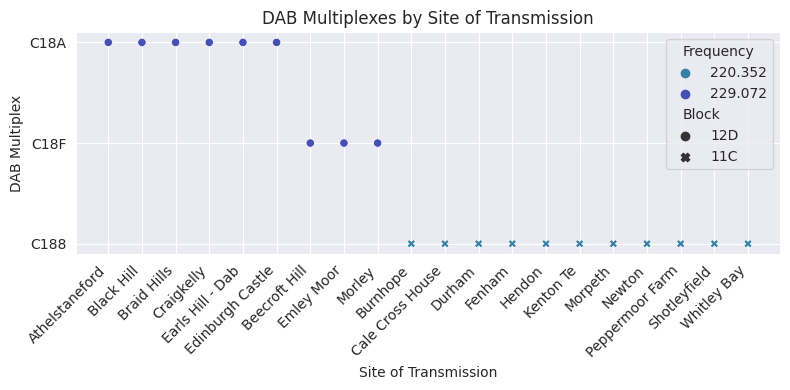

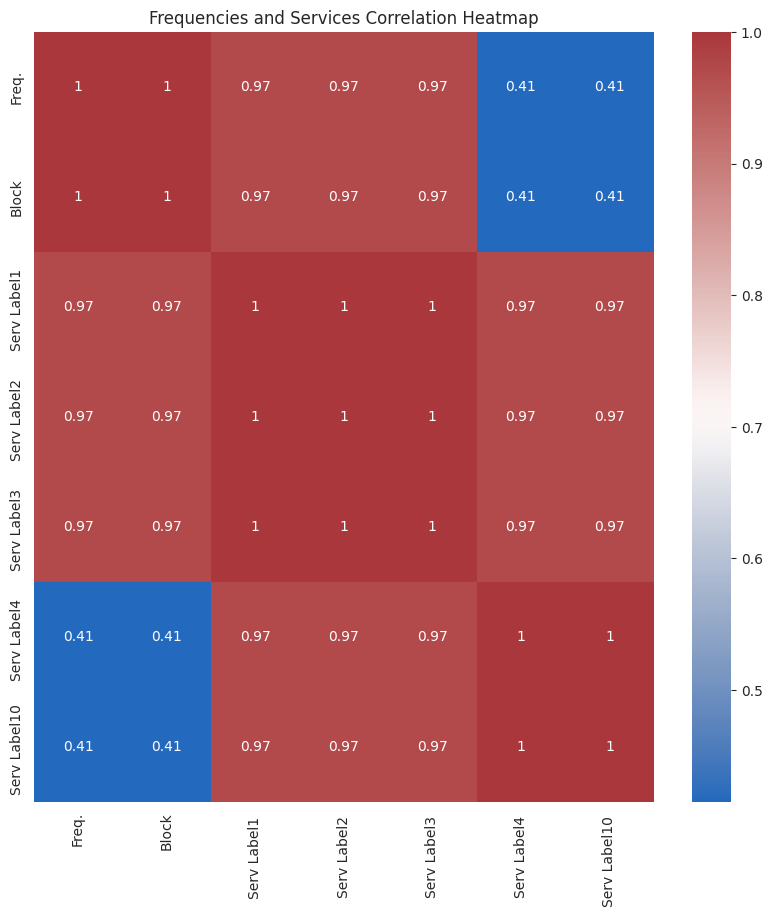

75.0
option more
746150    1000.000
746151    2399.999
746152     977.237
746153    5999.997
746154     740.000
746155      27.200
746233     977.237
746234    5000.000
746236    1000.000
746581    4379.999
746583     300.000
746584    1499.999
746586     100.000
746588     600.000
746589    1199.999
746590     300.000
Name: Power(kW), dtype: float64
746150   2016-05-25
746151   2000-10-10
746152   2007-05-02
746153   2000-10-11
746154   2016-05-12
746155   2018-03-28
746233   2001-05-15
746234   2013-05-13
746236   2001-11-14
746581   2000-11-21
746582   2017-11-23
746583   2016-07-27
746584   2000-11-15
746585   2016-07-27
746586   2016-09-19
746587   2016-04-26
746588   2016-05-26
746589   2016-08-25
746590   2016-04-05
746592   2016-06-30
Name: Date, dtype: datetime64[ns]
option from
746150    1000.000
746152     977.237
746154     740.000
746155      27.200
746234    5000.000
746582     300.000
746583     300.000
746585     800.000
746586     100.000
746587    1100.001
746588     

/tmp/ipykernel_32247/3867269195.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_data_df['Site'] = graph_data_df['Site'].str.title()
/tmp/ipykernel_32247/3867269195.py:181: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  DAB_plot = sns.scatterplot(data=graph_data_df, x='Site', y='EID', hue='Frequency', style ='Block', palette =[colour2, colour3, colour4 ], ax=ax)


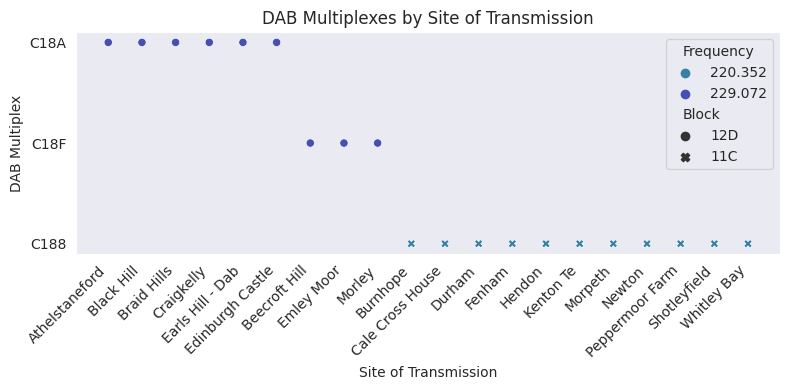

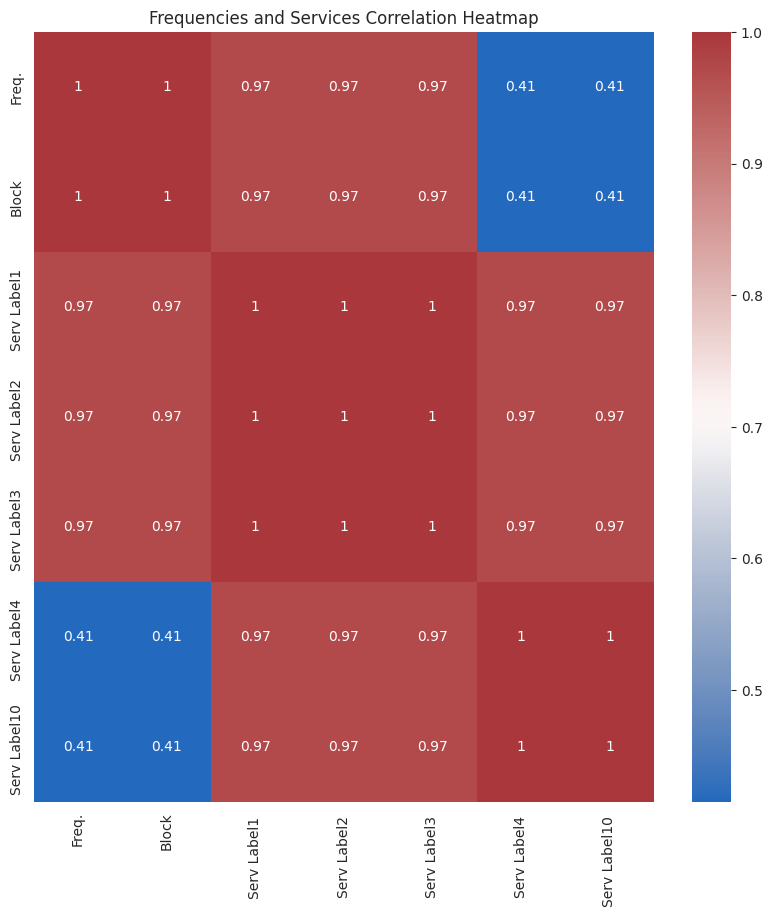

In [13]:
main_window.mainloop()